In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [3]:
# 랜덤 시드 설정(고정값을 주어 재현 가능하게 하기 위함)
torch.manual_seed(0)
x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0]])
y_train = torch.tensor([[3.0], [5.0], [7.0], [9.0], [11.0]])
print("x_train:", x_train)
print("y_train:", y_train)
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)


x_train: tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])
y_train: tensor([[ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.]])
x_train.shape: torch.Size([5, 1])
y_train.shape: torch.Size([5, 1])


In [4]:
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print("W:", W)
print("b:", b)

W: tensor([0.], requires_grad=True)
b: tensor([0.], requires_grad=True)


In [8]:
y = x_train * W + b
print("hypothesis:", y)

hypothesis: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [9]:
cost = torch.mean((y-y_train)**2)
print("const:", cost)

const: tensor(57., grad_fn=<MeanBackward0>)


In [16]:
optimizer = optim.SGD([W,b], lr=0.01)
epochs = 2000

for epoch in range(epochs + 1):
    optimizer.zero_grad()  # 기울기 초기화
    y = x_train * W + b  # 예측값 계산
    cost = torch.mean((y - y_train) ** 2)  # 손실 계산
    cost.backward()  # 기울기 계산
    optimizer.step()  # 가중치 업데이트

    if epoch % 10 == 0:
        print(f"Epoch {epoch:4d}/ {epochs} | Loss: {cost.item():.6f}, W: {W.item():.4f}, b: {b.item():.4f}")    

Epoch    0/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9995
Epoch   10/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9995
Epoch   20/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9996
Epoch   30/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9996
Epoch   40/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9996
Epoch   50/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9996
Epoch   60/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9996
Epoch   70/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9996
Epoch   80/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9996
Epoch   90/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9997
Epoch  100/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9997
Epoch  110/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9997
Epoch  120/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9997
Epoch  130/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9997
Epoch  140/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9997
Epoch  150/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9997
Epoch  160/ 2000 | Loss: 0.000000, W: 2.0001, b: 0.9997
Epoch  170/ 2000 | Loss: 0.000000, W: 2.0001, b:

In [14]:
def predict(x):
    return x * W + b

In [17]:
predicted = predict(torch.tensor([[6.0], [7.0], [8.0]]))
print("Predicted values for 6.0, 7.0, 8.0:", predicted)

Predicted values for 6.0, 7.0, 8.0: tensor([[13.0000],
        [15.0000],
        [17.0000]], grad_fn=<AddBackward0>)


In [22]:
torch.manual_seed(0)  # 랜덤 시드 재설정
print('랜덤 시드 테스트')
for i in range(5):
    print(torch.rand(1))  # 랜덤 값 출력
    

랜덤 시드 테스트
tensor([0.4963])
tensor([0.7682])
tensor([0.0885])
tensor([0.1320])
tensor([0.3074])


In [24]:
x_train = torch.tensor( [[73., 80., 75.],
                    [93., 88., 93.],
                    [89., 91., 90.],
                    [96., 98., 100.],
                    [73., 66., 70.],
                    [53., 65., 66.],
                    [69., 70., 73.],
                    [47., 56., 60.],
                    [87., 79., 90.],
                    [66., 70., 68.]
                    ])
t_train = torch.tensor([[152], [185], [180], [196], [142], [127], [135], [105], [175], [120]])
print("x_train:", x_train)
print("t_train:", t_train)
print("x_train.shape:", x_train.shape)
print("t_train.shape:", t_train.shape)

x_train: tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.],
        [ 53.,  65.,  66.],
        [ 69.,  70.,  73.],
        [ 47.,  56.,  60.],
        [ 87.,  79.,  90.],
        [ 66.,  70.,  68.]])
t_train: tensor([[152],
        [185],
        [180],
        [196],
        [142],
        [127],
        [135],
        [105],
        [175],
        [120]])
x_train.shape: torch.Size([10, 3])
t_train.shape: torch.Size([10, 1])


In [29]:
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print("W:", W)
print("b:", b)


W: tensor([[0.],
        [0.],
        [0.]], requires_grad=True)
b: tensor([0.], requires_grad=True)


In [30]:
optimizer = optim.SGD([W, b], lr=1e-5)
epochs = 2000

In [31]:
for epoch in range(epochs):
    optimizer.zero_grad()  # 기울기 초기화
    y = x_train.matmul(W) + b  # 예측값 계산
    cost = torch.mean((y-t_train) ** 2)  # 손실 계산
    cost.backward()  # 기울기 계산
    optimizer.step()  # 가중치 업데이트

    if epoch % 10 == 0:
        print(f"Epoch {epoch:4d}/ {epochs} | Loss: {cost.item():.6f}, W: {W.squeeze().tolist()}, b: {b.item():.4f}")

Epoch    0/ 2000 | Loss: 23871.300781, W: [0.23525799810886383, 0.23841999471187592, 0.24558399617671967], b: 0.0030
Epoch   10/ 2000 | Loss: 38.096970, W: [0.6461686491966248, 0.6530422568321228, 0.6742196083068848], b: 0.0083
Epoch   20/ 2000 | Loss: 35.081451, W: [0.6515966057777405, 0.6563611030578613, 0.6795138716697693], b: 0.0083
Epoch   30/ 2000 | Loss: 35.053772, W: [0.6524800062179565, 0.6550788879394531, 0.6800680160522461], b: 0.0082
Epoch   40/ 2000 | Loss: 35.026684, W: [0.6533081531524658, 0.6537494659423828, 0.680569052696228], b: 0.0081
Epoch   50/ 2000 | Loss: 34.999790, W: [0.6541313529014587, 0.652423620223999, 0.6810696125030518], b: 0.0080
Epoch   60/ 2000 | Loss: 34.973034, W: [0.6549502015113831, 0.6511021256446838, 0.6815701127052307], b: 0.0080
Epoch   70/ 2000 | Loss: 34.946449, W: [0.6557648181915283, 0.6497848629951477, 0.6820704936981201], b: 0.0079
Epoch   80/ 2000 | Loss: 34.920082, W: [0.6565752029418945, 0.6484718322753906, 0.6825708746910095], b: 0.00

In [ ]:
# 이제 torch.nn 사용해서 선형 회귀 모델을 구현해보겠습니다.
import numpy as np
torch.manual_seed(1)  # 랜덤 시드 설정


In [37]:
x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0]])
y_train = torch.tensor([[3.0], [5.0], [7.0], [9.0], [11.0]])

In [38]:
model = nn.Linear(1, 1)  # 선형 회귀 모델 정의( 입력 데이터 1개 , 출력데이터 1개 )
print("Model parameters before training:" , list(model.parameters()))


Model parameters before training: [Parameter containing:
tensor([[-0.1939]], requires_grad=True), Parameter containing:
tensor([0.4694], requires_grad=True)]


In [39]:
# 최적화
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 20000

In [40]:
for epoch in range(epochs):
    optimizer.zero_grad()  # 기울기 초기화
    y = model(x_train)  # 예측값 계산
    cost = F.mse_loss(y, y_train)  # 손실 계산
    cost.backward()  # 기울기 계산
    optimizer.step()  # 가중치 업데이트

    if epoch % 10 == 0:
        print(f"Epoch {epoch:4d}/ {epochs} | Loss: {cost.item():.6f}, W: {model.weight.item():.4f}, b: {model.bias.item():.4f}")


Epoch    0/ 20000 | Loss: 60.209667, W: 0.3206, b: 0.6116
Epoch   10/ 20000 | Loss: 0.272819, W: 1.8694, b: 1.0380
Epoch   20/ 20000 | Loss: 0.002042, W: 1.9740, b: 1.0646
Epoch   30/ 20000 | Loss: 0.000766, W: 1.9817, b: 1.0643
Epoch   40/ 20000 | Loss: 0.000711, W: 1.9827, b: 1.0623
Epoch   50/ 20000 | Loss: 0.000664, W: 1.9833, b: 1.0602
Epoch   60/ 20000 | Loss: 0.000621, W: 1.9839, b: 1.0582
Epoch   70/ 20000 | Loss: 0.000580, W: 1.9844, b: 1.0563
Epoch   80/ 20000 | Loss: 0.000542, W: 1.9849, b: 1.0544
Epoch   90/ 20000 | Loss: 0.000506, W: 1.9854, b: 1.0526
Epoch  100/ 20000 | Loss: 0.000473, W: 1.9859, b: 1.0508
Epoch  110/ 20000 | Loss: 0.000442, W: 1.9864, b: 1.0491
Epoch  120/ 20000 | Loss: 0.000413, W: 1.9868, b: 1.0475
Epoch  130/ 20000 | Loss: 0.000386, W: 1.9873, b: 1.0459
Epoch  140/ 20000 | Loss: 0.000361, W: 1.9877, b: 1.0444
Epoch  150/ 20000 | Loss: 0.000337, W: 1.9881, b: 1.0429
Epoch  160/ 20000 | Loss: 0.000315, W: 1.9885, b: 1.0415
Epoch  170/ 20000 | Loss: 0.00

In [41]:
prediected = model(torch.tensor([[6.0], [7.0], [8.0]]))
print("Predicted values for 6.0, 7.0, 8.0:", prediected)

Predicted values for 6.0, 7.0, 8.0: tensor([[13.0000],
        [15.0000],
        [17.0000]], grad_fn=<AddmmBackward0>)


In [79]:
x_train = torch.tensor( [[73., 80., 75.],
                    [93., 88., 93.],
                    [89., 91., 90.],
                    [96., 98., 100.],
                    [73., 66., 70.],
                    [53., 65., 66.],
                    [69., 70., 73.],
                    [47., 56., 60.],
                    [87., 79., 90.],
                    [66., 70., 68.]
                    ])
y_train = torch.tensor([[152.], [185.], [180.], [196.], [142.], [127.], [135.], [105.], [175.], [120.]])

In [83]:
torch.manual_seed(1)  # 랜덤 시드 설정
model = nn.Linear(3, 1)  # 선형 회귀 모델 정의( 입력 데이터 3개 , 출력데이터 1개 )
print("Model parameters before training:", list(model.parameters()))

Model parameters before training: [Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [ ]:
# 최적화
optimizer = optim.SGD(model.parameters(), lr=0.000000001)
epochs = 100000

In [85]:
for epoch in range(epochs):
    optimizer.zero_grad()  # 기울기 초기화
    y = model(x_train)  # 예측값 계산
    cost = F.mse_loss(y, y_train)  # 손실 계산
    cost.backward()  # 기울기 계산
    optimizer.step()  # 가중치 업데이트
    if epoch % 10 == 0:
        print(f"Epoch {epoch:4d}/ {epochs} | Loss: {cost.item():.6f}, W: {model.weight.squeeze().tolist()}, b: {model.bias.item():.4f}")
        

Epoch    0/ 200000 | Loss: 25650.408203, W: [0.2975116968154907, -0.2548050880432129, -0.11190052330493927], b: 0.2710
Epoch   10/ 200000 | Loss: 25631.869141, W: [0.29775547981262207, -0.2545578181743622, -0.11164595186710358], b: 0.2710
Epoch   20/ 200000 | Loss: 25613.351562, W: [0.2979990243911743, -0.2543107569217682, -0.11139146983623505], b: 0.2710
Epoch   30/ 200000 | Loss: 25594.847656, W: [0.2982425093650818, -0.2540636956691742, -0.11113707721233368], b: 0.2710
Epoch   40/ 200000 | Loss: 25576.351562, W: [0.29848599433898926, -0.2538166344165802, -0.11088277399539948], b: 0.2710
Epoch   50/ 200000 | Loss: 25557.871094, W: [0.2987293601036072, -0.2535698711872101, -0.11062857508659363], b: 0.2710
Epoch   60/ 200000 | Loss: 25539.408203, W: [0.29897254705429077, -0.25332310795783997, -0.11037446558475494], b: 0.2710
Epoch   70/ 200000 | Loss: 25520.951172, W: [0.29921573400497437, -0.25307634472846985, -0.11012044548988342], b: 0.2710
Epoch   80/ 200000 | Loss: 25502.511719, W

In [91]:
prediected = model(torch.tensor([[86.0, 77.0, 80.0], [98.0, 77.0, 80.0], [86.0, 90.0, 80.0]]))
print("Predicted values for 6.0, 7.0, 8.0:", prediected.squeeze().tolist())

Predicted values for 6.0, 7.0, 8.0: [163.9863739013672, 175.61924743652344, 169.54478454589844]


In [92]:
import pandas as pd
df = pd.read_csv('data/data-01-test-score.csv', header=None)
df

0   1    2    3
0   73  80   75  152
1   93  88   93  185
2   89  91   90  180
3   96  98  100  196
4   73  66   70  142
5   53  46   55  101
6   69  74   77  149
7   47  56   60  115
8   87  79   90  175
9   79  70   88  164
10  69  70   73  141
11  70  65   74  141
12  93  95   91  184
13  79  80   73  152
14  70  73   78  148
15  93  89   96  192
16  78  75   68  147
17  81  90   93  183
18  88  92   86  177
19  78  83   77  159
20  82  86   90  177
21  86  82   89  175
22  78  83   85  175
23  76  83   71  149
24  96  93   95  192

In [114]:
x_data = torch.tensor(df.values[:,:-1])
print(x_data)
t_data = torch.tensor(df.values[:,-1].reshape(-1, 1))
print(t_data)

tensor([[ 73,  80,  75],
        [ 93,  88,  93],
        [ 89,  91,  90],
        [ 96,  98, 100],
        [ 73,  66,  70],
        [ 53,  46,  55],
        [ 69,  74,  77],
        [ 47,  56,  60],
        [ 87,  79,  90],
        [ 79,  70,  88],
        [ 69,  70,  73],
        [ 70,  65,  74],
        [ 93,  95,  91],
        [ 79,  80,  73],
        [ 70,  73,  78],
        [ 93,  89,  96],
        [ 78,  75,  68],
        [ 81,  90,  93],
        [ 88,  92,  86],
        [ 78,  83,  77],
        [ 82,  86,  90],
        [ 86,  82,  89],
        [ 78,  83,  85],
        [ 76,  83,  71],
        [ 96,  93,  95]])
tensor([[152],
        [185],
        [180],
        [196],
        [142],
        [101],
        [149],
        [115],
        [175],
        [164],
        [141],
        [141],
        [184],
        [152],
        [148],
        [192],
        [147],
        [183],
        [177],
        [159],
        [177],
        [175],
        [175],
        [149],
        [192]]

In [115]:
torch.manual_seed(1)  # 랜덤 시드 설정
model = nn.Linear(3, 1)  # 선형 회귀 모델 정의( 입력 데이터 3개 , 출력데이터 1개 )
print("Model parameters before training:", list(model.parameters()))

Model parameters before training: [Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [116]:
# 최적화
optimizer = optim.SGD(model.parameters(), lr=1e-5)
epochs = 200000
const_list = []

In [117]:
for epoch in range(epochs):
    optimizer.zero_grad()  # 기울기 초기화
    y = model(x_train)  # 예측값 계산
    cost = F.mse_loss(y, y_train)  # 손실 계산
    cost.backward()  # 기울기 계산
    optimizer.step()  # 가중치 업데이트
    const_list.append([epoch, cost.item()])
    if epoch % 10 == 0:
        print(f"Epoch {epoch:4d}/ {epochs} | Loss: {cost.item():.6f}, W: {model.weight.squeeze().tolist()}, b: {model.bias.item():.4f}")
        

Epoch    0/ 200000 | Loss: 25650.408203, W: [0.541233241558075, -0.007556632161140442, 0.14269784092903137], b: 0.2741
Epoch   10/ 200000 | Loss: 36.656212, W: [0.9658024907112122, 0.4233471155166626, 0.5873690247535706], b: 0.2796
Epoch   20/ 200000 | Loss: 33.434044, W: [0.9700212478637695, 0.4278554320335388, 0.5931686162948608], b: 0.2796
Epoch   30/ 200000 | Loss: 33.422817, W: [0.9695349335670471, 0.42758920788764954, 0.5940526723861694], b: 0.2796
Epoch   40/ 200000 | Loss: 33.412075, W: [0.9689976572990417, 0.42726930975914, 0.5948802828788757], b: 0.2796
Epoch   50/ 200000 | Loss: 33.401337, W: [0.9684614539146423, 0.4269486367702484, 0.5957058072090149], b: 0.2795
Epoch   60/ 200000 | Loss: 33.390671, W: [0.9679269194602966, 0.4266277253627777, 0.596530020236969], b: 0.2795
Epoch   70/ 200000 | Loss: 33.379982, W: [0.9673939943313599, 0.42630666494369507, 0.5973527431488037], b: 0.2795
Epoch   80/ 200000 | Loss: 33.369347, W: [0.9668627977371216, 0.4259854555130005, 0.5981740

In [118]:
prediected = model(torch.tensor([[73.0, 80.0, 75.0], [98.0, 77.0, 80.0], [86.0, 90.0, 80.0]]))
print("Predicted values for 6.0, 7.0, 8.0:", prediected.squeeze().tolist())

Predicted values for 6.0, 7.0, 8.0: [147.21070861816406, 170.65594482421875, 163.4778289794922]


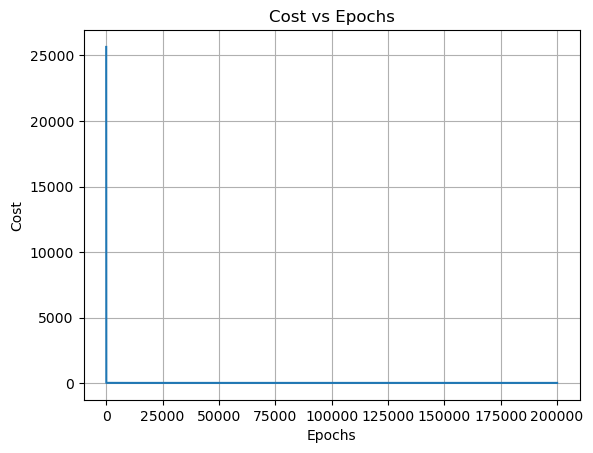

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# 커널 오류 발생시 
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

plt.plot(np.array(const_list)[:, 0], np.array(const_list)[:, 1])
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs')
plt.grid()
plt.show()

In [129]:
# 단순선형회귀 구현
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [130]:
# 모델 생성 및 최적화
model = LinearRegressionModel()
print("Model parameters before training:", list(model.parameters()))
optimizer = optim.SGD(model.parameters(), lr=1e-5)

Model parameters before training: [Parameter containing:
tensor([[ 0.2109, -0.2250, -0.0421]], requires_grad=True), Parameter containing:
tensor([-0.0520], requires_grad=True)]


In [131]:
# 학습
const_list2 = []
nb_epochs = 200000
for epoch in range(nb_epochs):
    prediction = model(x_train)  # 예측값 계산
    cost = F.mse_loss(prediction, y_train)  # 손실 계산
    optimizer.zero_grad()  # 기울기 초기화
    cost.backward()  # 기울기 계산
    optimizer.step()  # 가중치 업데이트
    const_list2.append([epoch, cost.item()])
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch:4d}/ {nb_epochs} | Loss: {cost.item():.6f}, W: {model.linear.weight.squeeze().tolist()}, b: {model.linear.bias.item():.4f}')

Epoch    0/ 200000 | Loss: 25348.755859, W: [0.4532085657119751, 0.020803749561309814, 0.2110176384449005], b: -0.0488
Epoch  100/ 200000 | Loss: 32.521137, W: [0.8785397410392761, 0.4492572844028473, 0.6641626954078674], b: -0.0437
Epoch  200/ 200000 | Loss: 32.445133, W: [0.8765032887458801, 0.44424816966056824, 0.6709851622581482], b: -0.0442
Epoch  300/ 200000 | Loss: 32.371323, W: [0.8744937181472778, 0.43931397795677185, 0.67770916223526], b: -0.0446
Epoch  400/ 200000 | Loss: 32.299660, W: [0.8725106120109558, 0.43445342779159546, 0.684336245059967], b: -0.0450
Epoch  500/ 200000 | Loss: 32.230019, W: [0.8705539703369141, 0.42966538667678833, 0.6908676028251648], b: -0.0454
Epoch  600/ 200000 | Loss: 32.162457, W: [0.8686231970787048, 0.42494887113571167, 0.6973046064376831], b: -0.0459
Epoch  700/ 200000 | Loss: 32.096794, W: [0.8667182326316833, 0.42030277848243713, 0.703648567199707], b: -0.0463
Epoch  800/ 200000 | Loss: 32.033012, W: [0.8648388385772705, 0.415725976228714, 

In [132]:
new_data = torch.tensor([[73.0, 80.0, 75.0], [98.0, 77.0, 80.0], [86.0, 90.0, 80.0]])
predicted = model(new_data)
print("Predicted values for new data:", predicted.squeeze().tolist())

Predicted values for new data: [147.19822692871094, 170.53811645507812, 163.4517364501953]


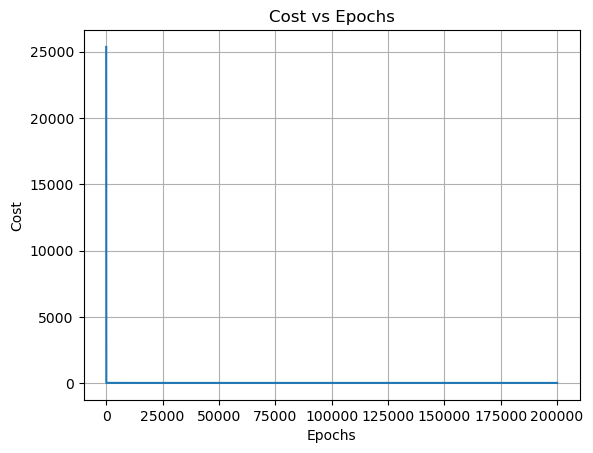

In [133]:
import numpy as np
import matplotlib.pyplot as plt

# 커널 오류 발생시 
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

plt.plot(np.array(const_list2)[:, 0], np.array(const_list2)[:, 1])
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs')
plt.grid()
plt.show()